In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import math
%matplotlib inline

In [154]:
# Сгенерируем выборку
N = 100
X = sps.cauchy.rvs(loc=0, scale=1, size=N)

Оценка максимального правдоподобия для $N(\theta, 1)$: $\overline X$

Сопряженное априорное распределение для $N(\theta, 1)$: $N(\alpha, \beta^2)$

Соответственно Байесовская оценка: $E(\theta |X) = \frac{\alpha + \beta^2 \sum_{x \in X}{x}}{n\beta^2 + 1}$

Очевидно, что $\alpha = 0$. $\beta$ же можно найти из условия $P(|\theta|<0.5) <0.95$: $\beta = \frac{1}{2*x_{0.95}}$, где x - квантиль.

In [155]:
# Функции оценок
def likehoodEstimation(X):
    return np.mean(X)

b2 = (0.5 / sps.norm.ppf(0.5 + 0.95 / 2)) ** 2
def bayesEstimation(X):
    return (b2 * np.sum(X)) / (len(X) * b2 + 1)
print b2

0.0650794429068


In [156]:
# Для префиксов выборки посчитаем отклонение оценки от реального значения
def fillEstimation(X, expected, estimation):
    result = np.zeros(len(X))
    for n in range(1, len(X) + 1):
        result[n - 1] = abs(estimation(X[:n]) - expected)
    return result

In [159]:
# Построение графиков
def showGraph(X, expected, scale):
    x = np.arange(1, len(X) + 1)

    plt.figure(figsize=(9, 5))
    plt.plot(x, fillEstimation(X, expected, likehoodEstimation), label='Likehood')
    plt.plot(x, fillEstimation(X, expected, bayesEstimation), label='Bayes')
    plt.legend(loc='best')
    plt.ylim((0, scale))
    plt.xlabel('n')
    plt.ylabel('$|\\theta - estimation|$')
    plt.show()

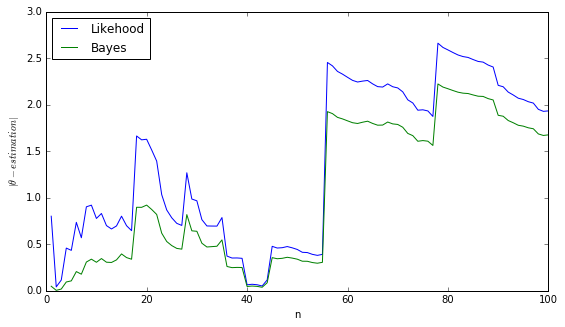

In [160]:
showGraph(X, 0, 3)

Из графиков видно, что Байесовская оценка лучше, чем оценка максимального правдоподобия, но графики оценок похожи и далеки от правды, потому что выборка осуществлялась из распределения Коши.